<a href="https://colab.research.google.com/github/aznduck/aznduck/blob/main/ESAP_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**This is what you'll need to submit on Gradescope:**

1. This notebook, completed.
2. Your data in csv form (as noted in the Data Cleaning section below).
3. Any other code you have written for your project.

# Data cleaning

The first step to data analysis is ensuring that you are focussing on the subset of the data that you have complete information about.

1. Having taken a look at your dataset, what columns and rows have you decided to drop from it? Why?

*A valid reason for dropping a column could be lack of information about the column, lack of a clear understanding of the units of measurement, a general feeling that it does not contain any useful information etc*

If you decided to focus on just a subset of your data please describe why you chose that subset and why you feel the other rows do not matter.



We have decided to drop the Year to Date rank because we are unsure of how it is calculating and what the exact meaning of it is. Also, we feel that the data we are provided with in the Days In Top 10 as well as the weekly rankings are sufficient for our data analysis. At the beginning we will use the function drop_duplicates to account for any errors in the data collection. We are replacing all null values in the exclusive column with "No" to simplify the analyzation.

Viewership Score Meaning: The Viewership Score is a score assigned to each show based on its historical daily ranking, assigning 10 points for each no. 1 ranking, 9 points for each no. 2 ranking etc.

2. If you chose to merge on any additional datasets, include the code for that here. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
netflix = pd.read_csv('/content/netflix daily top 10.csv')
netflix.drop_duplicates() #drops duplicates
netflix = netflix.drop(["Year to Date Rank"], axis = 1) #drops column
netflix["Netflix Exclusive"] = netflix["Netflix Exclusive"].fillna("No") #replaces all NaN values in Netflix Exclusive column with "No"
netflix.head()

,As of,Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,2,All American,TV Show,No,"Mar 28, 2019",9,76
3,2020-04-01,4,-,Blood Father,Movie,No,"Mar 26, 2020",5,30
4,2020-04-01,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [ ]:
netflix_extra = pd.read_csv('/content/netflix_titles.csv')
netflix_extra

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Exploring the data

Using sorting, groupby etc find out some interesting aspects of the data. Even a short fact counts. For instance, if you were working with population data, you could say that 25% of the world lives in South Asia after you do some group by commands.

In this section of your project try to find as many interesting facts as possible. 

Percentage of Genres

In [ ]:
val_count = netflix['Type'].value_counts()
print("percent of rankings that are TV shows:", round(100 * val_count[0] / len(netflix), 2))
print("percent of rankings that are Movies:", round(100 * val_count[1] / len(netflix), 2))
print("percent of rankings that are Stand-Up Comedy:", round(100 * val_count[2] / len(netflix), 2))
print("percent of rankings that are Concert/Performance:", round(100 * val_count[3] / len(netflix), 2))

percent of rankings that are TV shows: 62.62
percent of rankings that are Movies: 36.77
percent of rankings that are Stand-Up Comedy: 0.58
percent of rankings that are Concert/Performance: 0.03


Shows with Top Viewership Scores

In [ ]:
netflix_grouped = netflix.groupby(["Title"], as_index = False).agg(max_view_score = ("Viewership Score", np.max))
netflix_grouped = netflix_grouped.sort_values('max_view_score', ascending = False)
print("Shows and Movies with the Top viewership score:\n", netflix_grouped['Title'][:5])

Shows and Movies with the Top viewership score:
 110      Cocomelon
306       Manifest
108      Cobra Kai
350          Ozark
347    Outer Banks
Name: Title, dtype: object


Combination of TV and Exclusives

In [ ]:
netflix_exclusives = netflix.loc[0:len(netflix), ["Title", "Type", "Netflix Exclusive", "Viewership Score"]]
#sorting shows by score
netflix_exclusives_sorted = netflix_exclusives.sort_values(["Viewership Score"], ascending = False)
#removing all duplicates of shows except for one with the max viewership score
netflix_exclusives_avg_max = netflix_exclusives_sorted.drop_duplicates(subset = ["Title"])

In [ ]:
#booleans denoting combinations of two conditions
is_tv = netflix_exclusives_avg_max["Type"] == "TV Show" 
is_exclusive = netflix_exclusives_avg_max["Netflix Exclusive"] == "Yes"
is_movie = netflix_exclusives_avg_max["Type"] == "Movie"
not_exclusive = netflix_exclusives_avg_max["Netflix Exclusive"] == "No"
#4 dataframes denoting combinations
tv_yes = netflix_exclusives_avg_max[is_exclusive & is_tv]
tv_no = netflix_exclusives_avg_max[not_exclusive & is_tv]
movie_yes = netflix_exclusives_avg_max[is_exclusive & is_movie]
movie_no = netflix_exclusives_avg_max[not_exclusive & is_movie]
  
# initialize list of lists
tvs_data = [['TV_Yes', np.average(tv_yes["Viewership Score"])], ['TV_NO', np.average(tv_no["Viewership Score"])], 
          ['MOVIE_YES', np.average(movie_yes["Viewership Score"])], ['MOVIE_NO', np.average(movie_no["Viewership Score"])]]
  
# Create the pandas DataFrame
tv_analyze = pd.DataFrame(tvs_data, columns=['Classification', 'Avg. Viewer Score'])
  
# print dataframe.
tv_analyze


,Classification,Avg. Viewer Score
0,TV_Yes,85.671171
1,TV_NO,107.213115
2,MOVIE_YES,49.966667
3,MOVIE_NO,28.977143


Most Common Words in Comedy Descriptions

In [ ]:
netflix_extra_com = netflix_extra.loc[0:len(netflix_extra), ["listed_in", "description"]]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

netflix_extra_com = netflix_extra_com[netflix_extra_com["listed_in"].str.contains("Comedies")]
netflix_extra_com['simple_description'] = netflix_extra_com['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def return_words_in_list(x):
  punc = ''',.–—'''
  for char in x:
    if char in punc or char == "A":
      x = x.replace(char, "")
  x = x.split()
  return x

In [ ]:
#netflix_extra_com = netflix_extra_com.reset_index()
comedy_rows = []
for index, row in netflix_extra_com.iterrows():
    comedy_rows.append(return_words_in_list(row['simple_description']))
  
comedy_words = [item for sublist in comedy_rows for item in sublist]
comedy_words



['In',
 'city',
 'coaching',
 'centers',
 'known',
 'train',
 'India’s',
 'finest',
 'collegiate',
 'minds',
 'earnest',
 'unexceptional',
 'student',
 'friends',
 'navigate',
 'campus',
 'life',
 'woman',
 'adjusting',
 'life',
 'loss',
 'contends',
 'feisty',
 'bird',
 "that's",
 'taken',
 'garden',
 'husband',
 "who's",
 'struggling',
 'find',
 'way',
 'forward',
 'When',
 'clever',
 'socially-awkward',
 'Tetê',
 'joins',
 'new',
 'school',
 "she'll",
 'anything',
 'fit',
 'in',
 'But',
 'queen',
 'bee',
 'among',
 'classmates',
 'ideas',
 'Students',
 'color',
 'navigate',
 'daily',
 'slights',
 'slippery',
 'politics',
 'life',
 'Ivy',
 'League',
 'college',
 "that's",
 'nearly',
 '"post-racial"',
 'thinks',
 'Newly',
 'divorced',
 'denied',
 'visitation',
 'rights',
 'daughter',
 'doting',
 'father',
 'disguises',
 'gray-haired',
 'nanny',
 'order',
 'spend',
 'time',
 'her',
 'When',
 'father',
 'man',
 'loves',
 'insists',
 'twin',
 'sons',
 'marry',
 'twin',
 'sisters',
 'woma

In [ ]:
from collections import Counter
Counter = Counter(comedy_words)
top_10_comedy_words = Counter.most_common(10)
top_10_comedy_words

netflix_words = pd.DataFrame(top_10_comedy_words, columns=['Words', 'Occurrences'])
netflix_words



,Words,Occurrences
0,When,263
1,life,201
2,fter,186
3,new,176
4,family,166
5,friends,164
6,man,161
7,young,158
8,love,145
9,woman,134


Duration vs. Release Year

In [ ]:
netflix_movie_duration = netflix_extra[netflix_extra['type'].str.contains('Movie')]
netflix_movie_duration = netflix_movie_duration.dropna(axis = 0, subset = ['duration'])
netflix_movie_duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
num_time_list = []
for time in netflix_movie_duration["duration"]:
  time = str(time)
  time = time.split()
  num_time_list.append(int(time[0]))
netflix_movie_duration['duration (min)'] = num_time_list
netflix_movie_duration = netflix_movie_duration.sort_values('duration (min)', ascending = True)
netflix_movie_duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration (min)
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3
2713,s2714,Movie,Sol Levante,Akira Saitoh,NaN,Japan,"April 2, 2020",2020,TV-14,5 min,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,5
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...,8
1557,s1558,Movie,Canvas,Frank E. Abney III,NaN,United States,"December 11, 2020",2020,G,9 min,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru...",9
3535,s3536,Movie,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",United States,"September 5, 2019",2019,TV-G,10 min,Documentaries,Barack and Michelle Obama talk with directors ...,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,"May 21, 2020",1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,233
2487,s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,237
2491,s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,253
717,s718,Movie,Headspace: Unwind Your Mind,NaN,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",NaN,"June 15, 2021",2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply...",273


# Visualizations 

Make at least 6 visualizations (if this number is unreasonable please talk to your mentoring TA before reducing it) that reveal something interesting about the data. Try to include at least one scatterplot and one histogram/bar graph (again, if the data does not lend itself to these plots do let us know

Make sure that your visualizations
1. Have things like the axes, titles, units etc
2. Are telling a slightly interesting story. Interesting = something a person who has not seen this data might not be able to just guess.

Write a few lines telling us what your visualization represents and what it reveals. Discuss any potential hypotheses that could result from these visualizations.

_Write your answer in this markdown cell._

In [ ]:
netflix_grouped = netflix[netflix['Type'].str.contains('TV Show')]
netflix_grouped = netflix.groupby(["Title"], as_index = False).agg(top_view_score = ("Viewership Score", np.max))
netflix_grouped = netflix_grouped.sort_values('top_view_score', ascending = True)
netflix_grouped.head()

,Title,top_view_score
391,Scary Stories to Tell in th…,1
516,The Lucky One,1
48,Are We There Yet?,1
232,How to Train Your Dragon 2,1
131,Dare Me: Season 1,1


<BarContainer object of 10 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


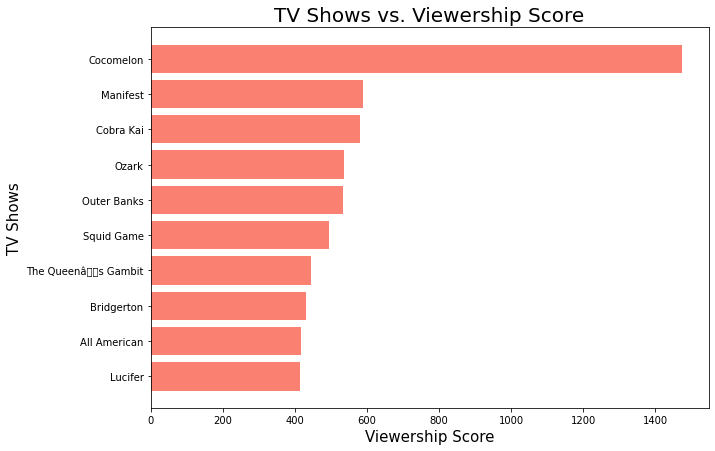

In [ ]:
plt.figure(figsize=(10,7))

plt.title('TV Shows vs. Viewership Score', fontsize = 20)

plt.xlabel('Viewership Score', fontsize = 15)
plt.ylabel('TV Shows', fontsize = 15)

plt.barh(netflix_grouped["Title"][-10:], netflix_grouped["top_view_score"][-10:], color = "salmon")

In [ ]:
netflix_movies = netflix[netflix['Type'].str.contains('Movie')]
netflix_movies = netflix_movies.groupby(["Title"], as_index = False).agg(top_view_score = ("Viewership Score", np.max))
netflix_movies = netflix_movies.sort_values('top_view_score', ascending = True)
netflix_movies.head()

,Title,top_view_score
73,Dark Shadows,1
233,Step Up Revolution,1
281,The Lucky One,1
215,Scary Stories to Tell in th…,1
125,How to Train Your Dragon 2,1


<BarContainer object of 10 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


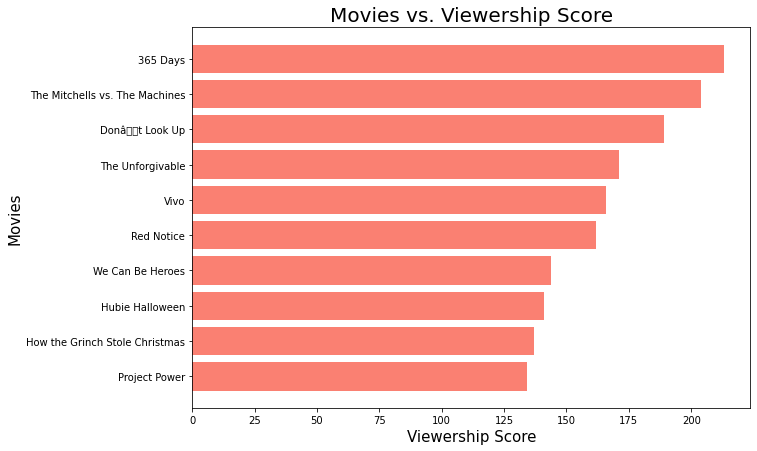

In [ ]:
plt.figure(figsize=(10,7))

plt.title('Movies vs. Viewership Score', fontsize = 20)

plt.xlabel('Viewership Score', fontsize = 15)
plt.ylabel('Movies', fontsize = 15)

plt.barh(netflix_movies["Title"][-10:], netflix_movies["top_view_score"][-10:], color = "salmon")

([<matplotlib.patches.Wedge at 0x7ff1fa5cd090>,
 [Text(-0.4369031183688372, 1.0095125879153692, 'TV Shows'),
  Text(0.4369031183688371, -1.0095125879153692, 'Movies')],
 [Text(-0.23831079183754755, 0.5506432297720195, '63.0%'),
  Text(0.2383107918375475, -0.5506432297720195, '37.0%')])

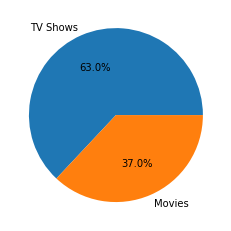

In [ ]:
plt.figure(figsize=(7,4))
netflix_movie = netflix[netflix["Type"].str.contains("Movie")]
netflix_types = {"Type" :["TV Shows", "Movies"], "count" :[4446, 2611]}
netflix_types
plt.pie(netflix_types["count"], labels = netflix_types["Type"], autopct = "%1.1f%%")

Movie vs. TV AND Exclusive vs. NOT

Text(0.5, 1.0, 'Viewer Score vs. Netflix Exclusivity')

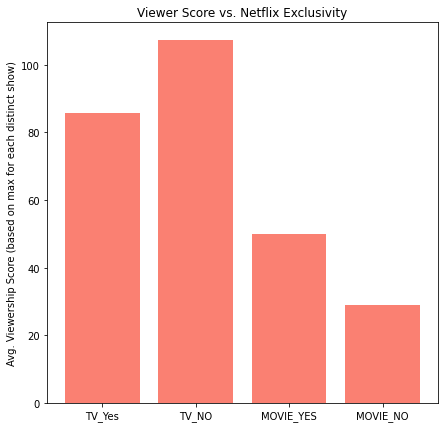

In [ ]:
plt.figure(figsize=(7, 7))
plt.bar(tv_analyze["Classification"], height = tv_analyze["Avg. Viewer Score"], color = "salmon")
plt.ylabel("Avg. Viewership Score (based on max for each distinct show)")
plt.title("Viewer Score vs. Netflix Exclusivity")

#try to turn this into a horizontal bar char. plt.barh

Common Words in Comedy Descriptions

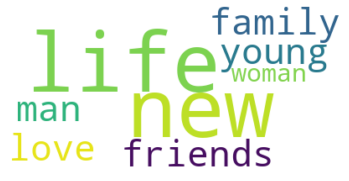

In [ ]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate('when life after new family friends man young love woman')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

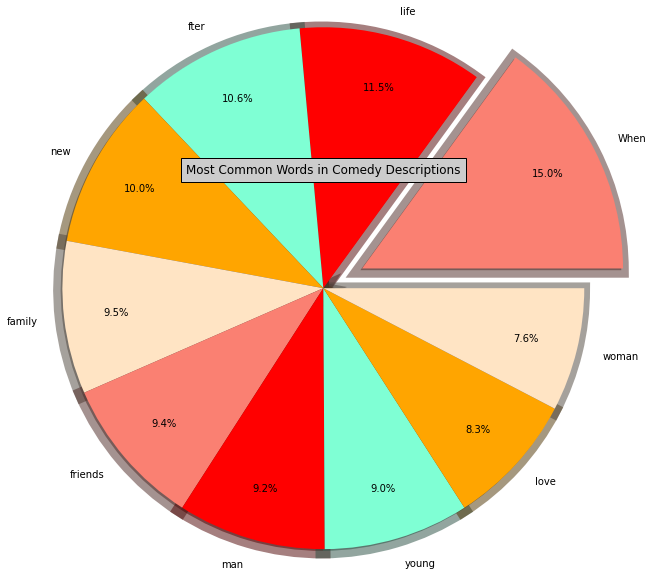

In [ ]:
our_col = ["salmon", "red", "aquamarine", "orange", "bisque"]

plt.title("Most Common Words in Comedy Descriptions", bbox={'facecolor':'0.8', 'pad':5})
plt.pie(netflix_words['Occurrences'], explode = (0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0), labels = netflix_words['Words'], autopct="%1.1f%%", radius = 3, pctdistance=0.8, colors = our_col, shadow=True, wedgeprops = {'linewidth': 15})
plt.show()

TV Shows vs. Days in Top 10

In [ ]:
netflix_tv_days = netflix.groupby(["Title"], as_index = False).agg(max_days_top_10 = ("Days In Top 10", np.max))
netflix_tv_days = netflix_tv_days.sort_values('max_days_top_10', ascending = True)
netflix_tv_days

,Title,max_days_top_10
43,Animals on the Loose: A You…,1
391,Scary Stories to Tell in th…,1
343,One on One,1
204,Hannibal,1
161,Elves,1
...,...,...
537,The Queenâs Gambit,73
306,Manifest,80
108,Cobra Kai,81
350,Ozark,89


<BarContainer object of 10 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


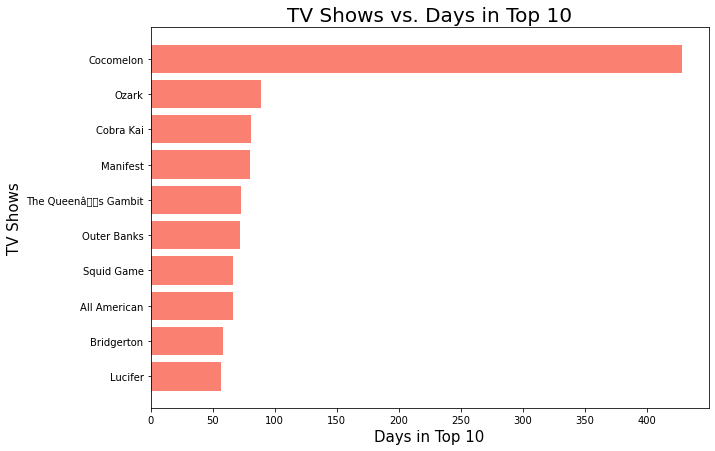

In [ ]:
plt.figure(figsize=(10,7))

plt.title('TV Shows vs. Days in Top 10', fontsize = 20)

plt.xlabel('Days in Top 10', fontsize = 15)
plt.ylabel('TV Shows', fontsize = 15)

plt.barh(netflix_tv_days["Title"][-10:], netflix_tv_days["max_days_top_10"][-10:], color = "salmon")

Movies vs. Days in Top 10

In [ ]:
netflix_movie_days = netflix[netflix['Type'].str.contains('Movie')]
netflix_movie_days = netflix_movie_days.groupby(["Title"], as_index = False).agg(max_days_top_10 = ("Days In Top 10", np.max))
netflix_movie_days  = netflix_movie_days.sort_values('max_days_top_10', ascending = True)
netflix_movie_days 

,Title,max_days_top_10
30,Animals on the Loose: A You…,1
33,Are We There Yet?,1
212,Salt,1
298,The Secret Life of Pets 2,1
215,Scary Stories to Tell in th…,1
...,...,...
82,Despicable Me 2,27
6,365 Days,28
337,Vivo,29
124,How the Grinch Stole Christmas,29


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


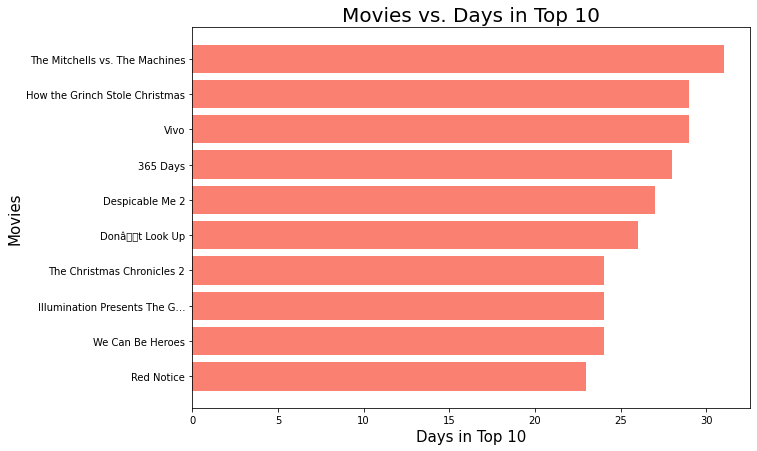

In [ ]:
plt.figure(figsize=(10,7))

plt.title('Movies vs. Days in Top 10', fontsize = 20)

plt.xlabel('Days in Top 10', fontsize = 15)
plt.ylabel('Movies', fontsize = 15)

plt.barh(netflix_movie_days["Title"][-10:], netflix_movie_days["max_days_top_10"][-10:], color = "salmon")
plt.show()

Duration vs. Release Year 

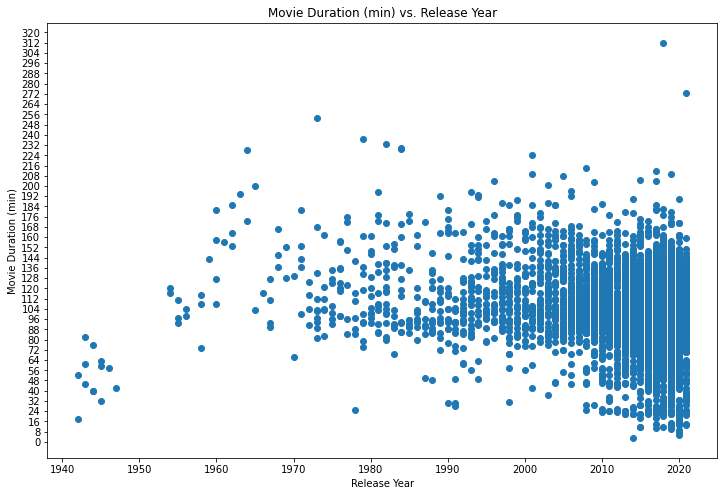

In [ ]:
plt.figure(figsize=(12, 8))

plt.title('Movie Duration (min) vs. Release Year')

plt.xlabel('Release Year')
plt.ylabel('Movie Duration (min)')

plt.yticks(ticks = np.arange(0, 900, 8))

plt.scatter(netflix_movie_duration["release_year"], netflix_movie_duration["duration (min)"])
plt.show()